# **Introduction to Deep Learning**

# **Mini Project 2**

**Student Number - PS/2019/051 Name - PS/2019/051**

**Selected Company - Singer Srilanka**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Mount Google Drive

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

Mounted at /content/drive


# Specify the path to the CSV file of the dataset on Google Drive

In [3]:
file_path = '/content/drive/MyDrive/Deep-Learning-MiniProject2_PS2019051/SINS Historical Data.csv'

# Load Data

In [4]:
data = pd.read_csv(file_path)
prices = data['Price'].values.reshape(-1, 1)

# Normalize Data

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# Split data into training and testing sets

In [6]:
split_ratio = 0.8
split_index = int(len(prices_normalized) * split_ratio)
train_data = prices_normalized[:split_index]
test_data = prices_normalized[split_index:]

# Prepare Data for LSTM

In [7]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data to be in the form [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
179/179 [==============================] - 8s 14ms/step - loss: 0.0066
Epoch 2/100
179/179 [==============================] - 3s 16ms/step - loss: 0.0035
Epoch 3/100
179/179 [==============================] - 3s 18ms/step - loss: 0.0029
Epoch 4/100
179/179 [==============================] - 2s 13ms/step - loss: 0.0029
Epoch 5/100
179/179 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 6/100
179/179 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 7/100
179/179 [==============================] - 3s 15ms/step - loss: 0.0016
Epoch 8/100
179/179 [==============================] - 4s 20ms/step - loss: 0.0013
Epoch 9/100
179/179 [==============================] - 2s 14ms/step - loss: 0.0014
Epoch 10/100
179/179 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 11/100
179/179 [==============================] - 2s 13ms/step - loss: 0.0011
Epoch 12/100
179/179 [==============================] - 2s 14ms/step - loss: 0.0014
E

# Predictions

7/7 [==============================] - 1s 5ms/step


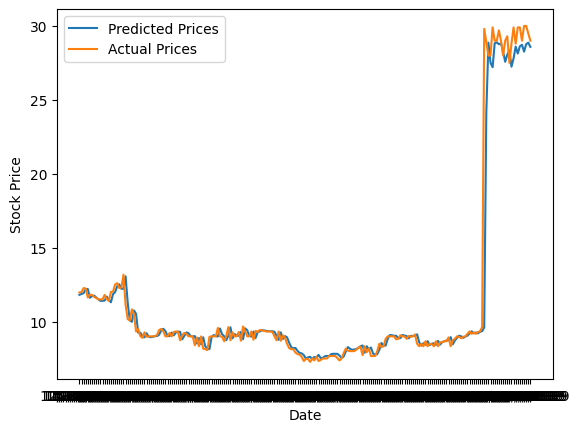

In [13]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Plot the results
plt.plot(data['Date'][split_index + time_steps:], predicted_stock_prices, label='Predicted Prices')
plt.plot(data['Date'][split_index + time_steps:], scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)),
         label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Comparison of the Prediced Prices with the Actual Prices

In [14]:
# Combine actual and predicted prices into a DataFrame for easier printing
results_df = pd.DataFrame({
    'Date': data['Date'][split_index + time_steps:],
    'Actual Prices': scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)).flatten(),
    'Predicted Prices': predicted_stock_prices.flatten()
})

# Print the DataFrame
print(results_df)

            Date  Actual Prices  Predicted Prices
914   12/31/2019          11.97         11.806500
915   12/30/2019          12.00         11.870392
916   12/27/2019          12.27         11.924781
917   12/26/2019          12.23         12.195245
918   12/24/2019          11.63         12.199112
...          ...            ...               ...
1125  01/08/2019          29.00         28.722057
1126  01/07/2019          30.00         28.260550
1127  01/04/2019          30.00         28.762913
1128  01/03/2019          29.50         28.868216
1129  01/02/2019          29.00         28.581795

[216 rows x 3 columns]


# Assess the performance of the model by computing the root mean squared error (RMSE)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test data
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Inverse transform the original test data for comparison
actual_stock_prices = scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1))

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

7/7 [==============================] - 0s 6ms/step
Root Mean Squared Error (RMSE): 1.4981372875115073
